In [1]:
import wandb
import yaml
from utilities.utils import correct_type_of_entry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
pd.set_option('display.max_rows', None)

/Users/mathieubazinet/.pyenv/versions/3.12.3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
dataset = "amazon"
sweep_config = "transformer"
values_to_fetch = ['kl_bound', 'binomial_approximation_shah', 'p2l_bound', 'compression_set_size',
                   'complement_error', 'validation_error', 'test_error', 'CE_kl_bound', "CE_min_val_catoni_bound",
                   'complement_loss', 'validation_loss', 'test_loss', '_runtime']

sweep_config_name = "./configs/sweep_configs/" + sweep_config + ".yaml"
with open(sweep_config_name) as file:
    sweep_configuration = yaml.safe_load(file)
    
hps = {}
for key, item in sweep_configuration['parameters'].items():
    if item.get('values', None) is not None:
        hps[key] = correct_type_of_entry(item['values'])

size_hyperparams = tuple([len(l) for l in hps.values()])

In [36]:
api = wandb.Api()
entity = "mathieu-bazinet"
project = "sweep" + dataset
runs = api.runs(entity + "/" + project)

In [37]:
results_matrix = np.ones(((len(values_to_fetch),) + size_hyperparams))

for run_idx in range(len(runs)):
    run = runs[run_idx]
    if run.state == "finished":
        for val_to_fetch_idx in range(len(values_to_fetch)):
            matrix_idx = tuple([val_to_fetch_idx] + [hps[key].index(run.config[key]) for key in hps.keys()])
            val_to_fetch = values_to_fetch[val_to_fetch_idx]
            results_matrix[matrix_idx] = run.summary[val_to_fetch]
from itertools import product

hp_list = list(hps.values())[1:]
params_product = list(product(*hp_list))
name_list = []
idx_list = []
for params in params_product:
    name = ""
    for p in params:
        name += str(p) + " "
    name_list.append(name[:-1])
    idx = ()
    for p_idx in range(len(params)):
        p_key = list(hps.keys())[1:][p_idx]
        idx += (hps[p_key].index(params[p_idx]),)
    idx_list.append(tuple(idx))

In [38]:
reshaped_matrix = results_matrix.mean(1).reshape(results_matrix.shape[0],np.prod(results_matrix.shape[2:])).T

mean_df = pd.DataFrame(reshaped_matrix, index=name_list, columns=values_to_fetch)
mean_df

,kl_bound,binomial_approximation_shah,p2l_bound,compression_set_size,complement_error,validation_error,test_error,CE_kl_bound,CE_min_val_catoni_bound,complement_loss,validation_loss,test_loss,_runtime
0.1 0.001,0.617573,0.776454,0.002486,320.0,0.530323,0.529550,0.529393,1.317789,1.329469,0.713992,0.714205,0.713589,13737.488161
0.1 0.0001,0.240392,0.429098,0.002486,320.0,0.167082,0.171065,0.170772,1.088073,1.113968,0.540121,0.541754,0.541786,12244.189897
0.1 1e-05,0.149133,0.292029,0.002628,339.2,0.088143,0.090641,0.093032,0.633482,0.683006,0.215865,0.227421,0.231732,13015.922621
0.2 0.001,0.617573,0.776454,0.002486,320.0,0.530323,0.529550,0.529393,1.317789,1.329469,0.713992,0.714205,0.713589,13404.580813
0.2 0.0001,0.240392,0.429098,0.002486,320.0,0.167082,0.171065,0.170772,1.088073,1.113968,0.540121,0.541754,0.541786,12332.474256
0.2 1e-05,0.149133,0.292029,0.002628,339.2,0.088143,0.090641,0.093032,0.633482,0.683006,0.215865,0.227421,0.231732,13084.349183


In [39]:
std_matrix = results_matrix.std(1).reshape(results_matrix.shape[0],np.prod(results_matrix.shape[2:])).T
std_df = pd.DataFrame(std_matrix, index=name_list, columns=values_to_fetch)
std_df

,kl_bound,binomial_approximation_shah,p2l_bound,compression_set_size,complement_error,validation_error,test_error,CE_kl_bound,CE_min_val_catoni_bound,complement_loss,validation_loss,test_loss,_runtime
0.1 0.001,0.055375,0.036929,0.000000,0.000000,0.057484,0.057913,0.057414,0.035029,0.033376,0.027038,0.026558,0.026626,974.751412
0.1 0.0001,0.008840,0.011419,0.000000,0.000000,0.007809,0.008316,0.007743,0.001656,0.001526,0.001226,0.001136,0.001279,563.862823
0.1 1e-05,0.000982,0.000704,0.000116,15.676734,0.000495,0.001202,0.000042,0.010654,0.008283,0.000765,0.002249,0.000435,904.386082
0.2 0.001,0.055375,0.036929,0.000000,0.000000,0.057484,0.057913,0.057414,0.035029,0.033376,0.027038,0.026558,0.026626,939.925566
0.2 0.0001,0.008840,0.011419,0.000000,0.000000,0.007809,0.008316,0.007743,0.001656,0.001526,0.001226,0.001136,0.001279,586.682605
0.2 1e-05,0.000982,0.000704,0.000116,15.676734,0.000495,0.001202,0.000042,0.010654,0.008283,0.000765,0.002249,0.000435,1099.172081


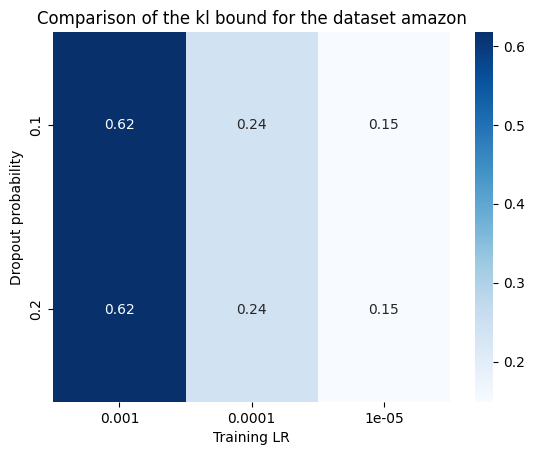

In [52]:
index = 0
mean_arr = results_matrix.mean(1)[index]
df = pd.DataFrame(mean_arr, index=hps['dropout_probability'], columns=hps['training_lr'])
sn.heatmap(df, annot=True, cmap="Blues")
plt.ylabel("Dropout probability")
plt.xlabel("Training LR")
# fig.suptitle(f"Comparison of the {values_to_fetch[index].replace("_", " ")} for the dataset {dataset}")
# # Layout so plots do not overlap
# fig.tight_layout()
# fig.align_labels()

plt.title(f"Comparison of the {values_to_fetch[index].replace("_", " ")} for the dataset {dataset}")
plt.savefig(f"./results/amazon/{dataset}_{values_to_fetch[index]}_heatmaps.jpg",bbox_inches='tight')

In [34]:
hps

{'seed': [1, 2, 3, 4, 42],
 'dropout_probability': [0.1, 0.2],
 'training_lr': [0.001, 0.0001, 1e-05]}